In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100, 1)

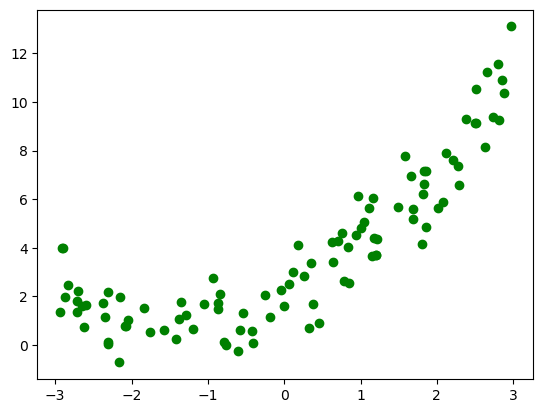

In [30]:
plt.scatter(x,y , color = 'g')

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 32)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred = reg.predict(x_test)

In [37]:
from sklearn.metrics import r2_score
score = r2_score(y_test , y_pred)
score

0.6649909074001773

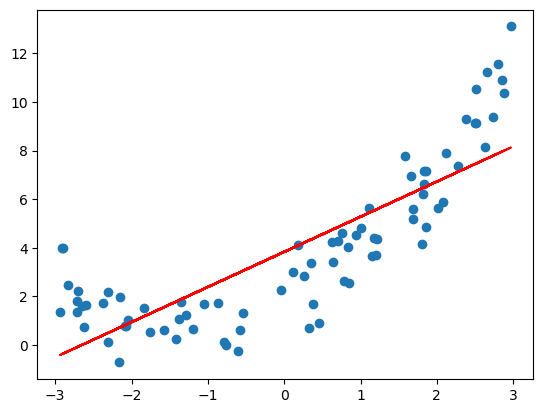

In [39]:
plt.scatter(x_train, y_train)
plt.plot(x_train , reg.predict(x_train), color = 'r')

<!-- to attain a good prediction we have to increase the polynomial degree -->

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
poly = PolynomialFeatures(degree = 2 , include_bias = True)
x_train_poly  = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [55]:
x_test_poly

array([[ 1.00000000e+00, -8.40503921e-01,  7.06446840e-01],
       [ 1.00000000e+00, -2.53165113e-01,  6.40925746e-02],
       [ 1.00000000e+00,  1.04808236e+00,  1.09847663e+00],
       [ 1.00000000e+00,  2.80992080e+00,  7.89565489e+00],
       [ 1.00000000e+00, -2.30684322e+00,  5.32152562e+00],
       [ 1.00000000e+00, -8.68919625e-01,  7.55021315e-01],
       [ 1.00000000e+00,  1.16693534e+00,  1.36173809e+00],
       [ 1.00000000e+00,  2.28482552e+00,  5.22042766e+00],
       [ 1.00000000e+00, -1.90727550e-01,  3.63769982e-02],
       [ 1.00000000e+00, -9.32886006e-01,  8.70276299e-01],
       [ 1.00000000e+00,  6.20526934e-02,  3.85053675e-03],
       [ 1.00000000e+00,  1.49709455e+00,  2.24129209e+00],
       [ 1.00000000e+00, -4.16230764e-01,  1.73248049e-01],
       [ 1.00000000e+00, -1.52041907e-03,  2.31167415e-06],
       [ 1.00000000e+00, -2.86737627e+00,  8.22184668e+00],
       [ 1.00000000e+00, -4.07750404e-01,  1.66260392e-01],
       [ 1.00000000e+00,  2.20662229e+00

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
rreg = LinearRegression()
rreg.fit(x_train_poly, y_train)

LinearRegression()

In [65]:
y_pred1 = rreg.predict(x_test_poly)

In [66]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test , y_pred1)
score1

0.8243307446437117

In [68]:
rreg.coef_
rreg.intercept_

array([1.82675792])

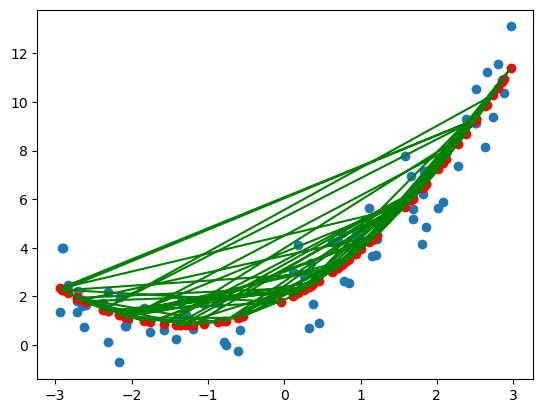

In [73]:
plt.scatter(x_train, y_train)
plt.scatter(x_train , rreg.predict(x_train_poly), color = 'r')
plt.plot(x_train , rreg.predict(x_train_poly), color = 'g')

In [78]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

In [75]:
y_new = rreg.predict(x_new_poly)

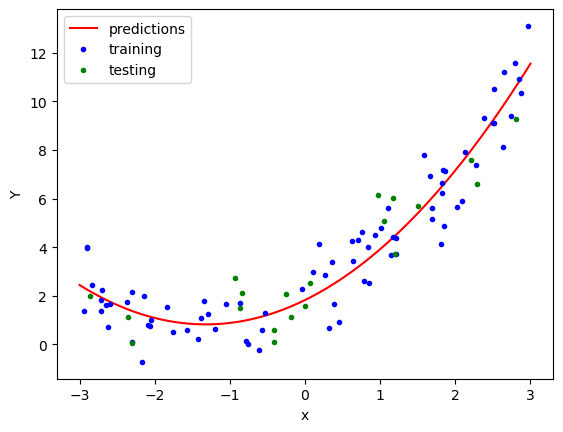

In [83]:
plt.plot(x_new, y_new, "r-", label = 'predictions')
plt.plot(x_train,y_train, "b." ,label = 'training')
plt.plot(x_test, y_test , "g.",label = 'testing')
plt.xlabel("x")
plt.ylabel("Y")
plt.legend()
plt.show()         